In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

In [4]:
df_csv = pd.read_csv('covid_19_clean_complete.csv')
df_csv

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0,0,0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0,0,0


In [13]:
df_sort = df_csv.sort_values(by=["Date"])
df_sort

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
168,Sint Maarten,Netherlands,18.0425,-63.0548,1/22/20,0,0,0
169,NaN,Netherlands,52.1326,5.2913,1/22/20,0,0,0
170,NaN,New Zealand,-40.9006,174.8860,1/22/20,0,0,0
171,NaN,Nicaragua,12.8654,-85.2072,1/22/20,0,0,0
172,NaN,Niger,17.6078,8.0817,1/22/20,0,0,0
173,NaN,Nigeria,9.0820,8.6753,1/22/20,0,0,0
174,NaN,North Macedonia,41.6086,21.7453,1/22/20,0,0,0
175,NaN,Norway,60.4720,8.4689,1/22/20,0,0,0
176,NaN,Oman,21.0000,57.0000,1/22/20,0,0,0


In [53]:
df_sort["Date"] = pd.to_datetime(df_sort["Date"])
df_sort["Date"]

0       2020-01-22
168     2020-01-22
169     2020-01-22
170     2020-01-22
171     2020-01-22
           ...    
28715   2020-05-09
28716   2020-05-09
28717   2020-05-09
28703   2020-05-09
28688   2020-05-09
Name: Date, Length: 31535, dtype: datetime64[ns]

In [41]:
np.max(df_sort["Confirmed"])

1528568

C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(0, 1528568)

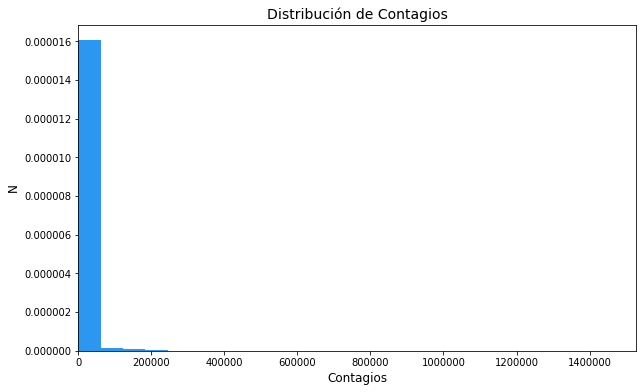

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df_sort["Confirmed"],25,color="#2c97f1", normed=True)
#x, 50, density=True, facecolor='g', alpha=0.75
plt.xlabel("Contagios", fontsize=12)
plt.ylabel("N", fontsize=12)
plt.title("Distribución de Contagios", fontsize=14)
plt.xlim(0, np.max(df_sort["Confirmed"]))


C:\Users\Jose\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


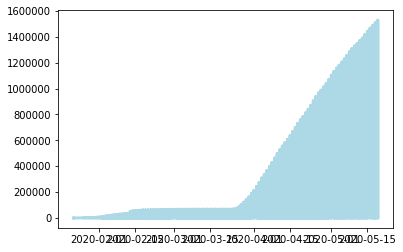

In [55]:
import matplotlib.pyplot as plt
plt.plot(df_sort["Date"], df_sort["Confirmed"], color='lightblue', linewidth=3)
plt.show()

## Usando feature-eng para crear un modelo exponencial de Covid-19

**Content**

Each row contains report from each region/location for each day
Each column represents the number of cases reported from each country/region


**Acknowledgements**

https://github.com/CSSEGISandData/COVID-19


In [57]:
covid19_data = pd.read_csv('covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [58]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object